In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
auto = pd.read_csv('Automobile price data _Raw_.csv', thousands=' ')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# DATA CLEANING

**Steps for working with missing data:**

    1.Identify missing data
    2.Deal with missing data
    3.Correct data format



**1. Identify missing data**
    
    Replacing '?' to NaN

In [4]:
auto.replace("?", np.nan, inplace=True)
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Evaluating Missing Data**

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

    1. .isnull()
    2. .notnull()

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data. 



"True" stands for missing value, while "False" stands for not missing value.


In [5]:
missing_data = auto.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Counting the missing values**

".value_counts()" counts the number of "True" values. 

In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa


    1. "normalized-losses": 41 missing data
    2. "num-of-doors": 2 missing data
    3. "bore": 4 missing data
    4. "stroke" : 4 missing data
    5. "horsepower": 2 missing data
    6. "peak-rpm": 2 missing data
    7. "price": 4 missing data
    
**2. Deal with missing data**

    1. drop data
        a. drop the whole row
        b. drop the whole column
    2. replace data
        a. replace it by mean
        b. replace it by frequency
        c. replace it based on other functions


In [7]:
#replacing the missing data by mean

auto['normalized-losses'] = auto['normalized-losses'].astype('float64')
avg_norm_loss = auto['normalized-losses'].mean()
auto["normalized-losses"].replace(np.nan,avg_norm_loss,inplace=True)
print("Average of normalized-losses:", avg_norm_loss)


avg_bore = auto["bore"].astype("float64").mean(axis=0)
auto["bore"].replace(np.nan,avg_bore,inplace=True)
print("Average of Bore Values:",avg_bore)


avg_stroke = auto["stroke"].astype("float64").mean(axis=0)
auto["stroke"].replace(np.nan,avg_stroke,inplace = True)
print("Average of Stroke Values:",avg_stroke)


avg_horsepower = auto["horsepower"].astype("float64").mean(axis=0)
auto["horsepower"].replace(np.nan,avg_horsepower,inplace = True)
print("Average of horsepower:",avg_horsepower)


avg_peakrpm = auto['peak-rpm'].astype('float64').mean(axis=0)
auto['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)
print("Average peak rpm:", avg_peakrpm)


Average of normalized-losses: 122.0
Average of Bore Values: 3.3297512437810957
Average of Stroke Values: 3.2554228855721337
Average of horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079




To see which values are present in a particular column,use the ".value_counts()" method:

We can also use the ".idxmax()" method to calculate for us the most common type automatically:


In [8]:
#replacing the missing data by most frequent

value_count = auto['num-of-doors'].value_counts()
id_max = auto['num-of-doors'].value_counts().idxmax()

print(value_count)
print("Id_Max is : ", id_max)

four    114
two      89
Name: num-of-doors, dtype: int64
Id_Max is :  four


In [9]:
auto['num-of-doors'].replace(np.nan,"four",inplace=True)

Droping all the missing data containing rows in 'price' column.

In [10]:
auto.dropna(subset=["price"], axis=0, inplace=True)
auto.reset_index(drop=True,inplace=True)
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**3. Correct data format**


In [11]:
auto[["bore", "stroke"]] = auto[["bore", "stroke"]].astype("float")

auto[["normalized-losses"]] = auto[["normalized-losses"]].astype("int")

auto[["price"]] = auto[["price"]].astype("float")

auto[["symboling"]] = auto[["symboling"]].astype("str")

auto[["peak-rpm"]] = auto[["peak-rpm"]].astype("float")

auto[["horsepower"]] = auto[["horsepower"]].astype("int")


In [12]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    object 
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

**Categorical columns**

In [13]:
categorical_cols=auto.select_dtypes(include=['object']).columns
auto[categorical_cols].head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


**Numerical columns**

In [14]:
numerical_cols = auto.select_dtypes(exclude=['object']).columns
auto[numerical_cols].head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500.0,18,22,17450.0


# EXPLORATORY DATA ANALYSIS

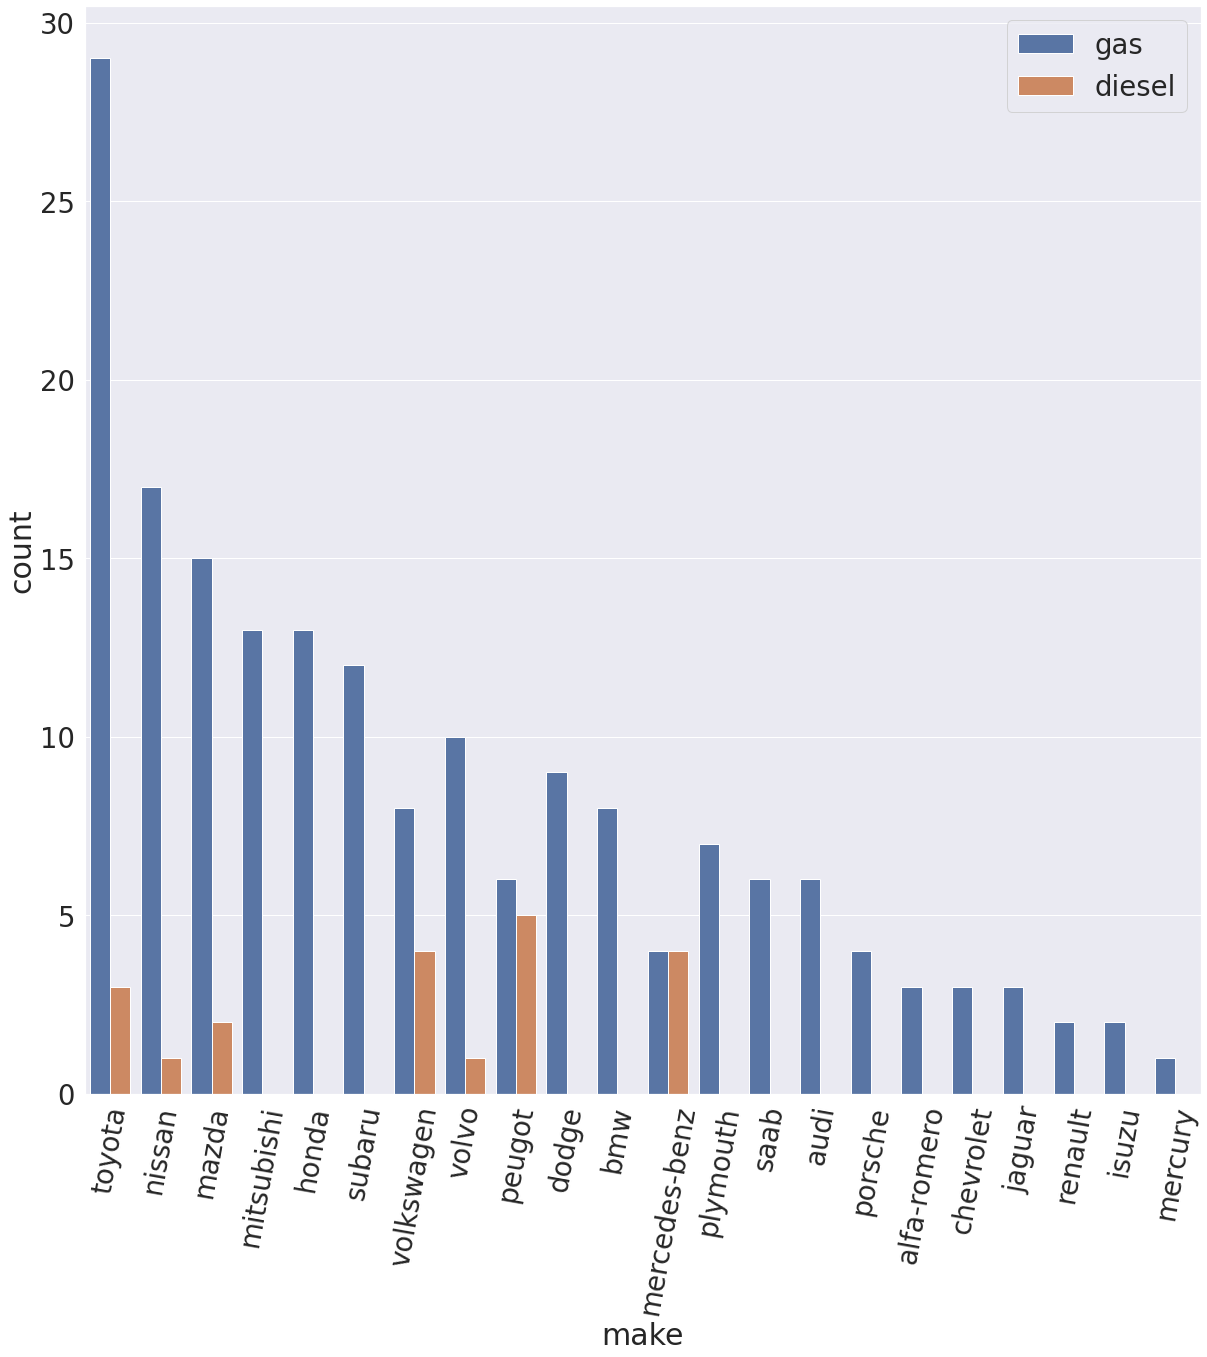

In [15]:
sns.set(style='darkgrid', palette='deep', font='sans-serif',font_scale=2.5)
order = auto['make'].value_counts(ascending=False).index
plt.figure(figsize=(20,20))
plot = sns.countplot(x ='make', hue = 'fuel-type', data = auto, order = order)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

plt.legend(loc='upper right')



According to the dataset-

    Toyota is the most suitable car. Most of the cars produced by 
    them are using diesel as the fuel.
    
    Mercury is the least suitable car.
    
    Mercedes Benz produces both diesel and gas using cars in equal ratio.
    
    Not every company's car uses gas as fuel. Most of them uses 
    diesel as there fuel type. 



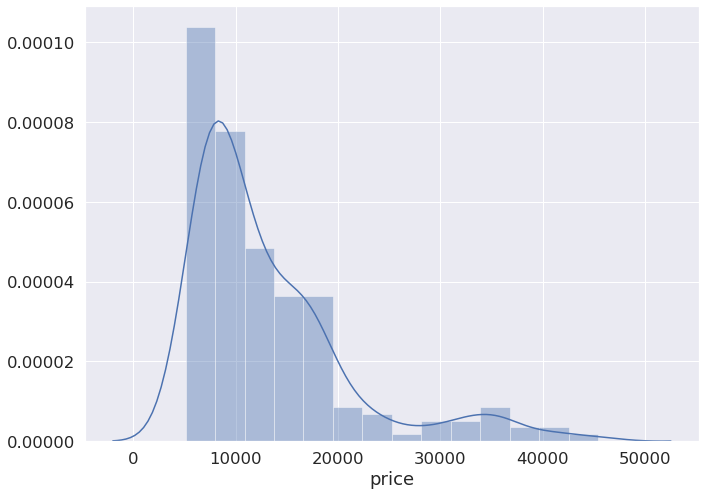

In [16]:
sns.set(style='darkgrid', palette='deep', font='sans-serif',font_scale=1.5)
plt.figure(figsize=(11,8))
sns.distplot(auto['price'],kde=True)

1) Price distribution plot is right skewed

2) Maximum number of cars are in range of 2000

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

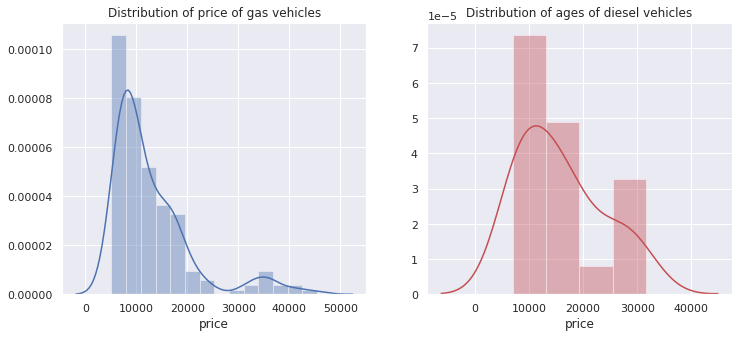

In [17]:
sns.set(style='darkgrid')
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(auto[(auto['fuel-type'] == 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(auto[(auto['fuel-type'] == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')


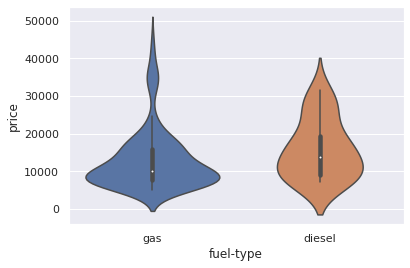

In [18]:
sns.set(style='darkgrid')
sns.violinplot(x = 'fuel-type', y = 'price', data = auto)

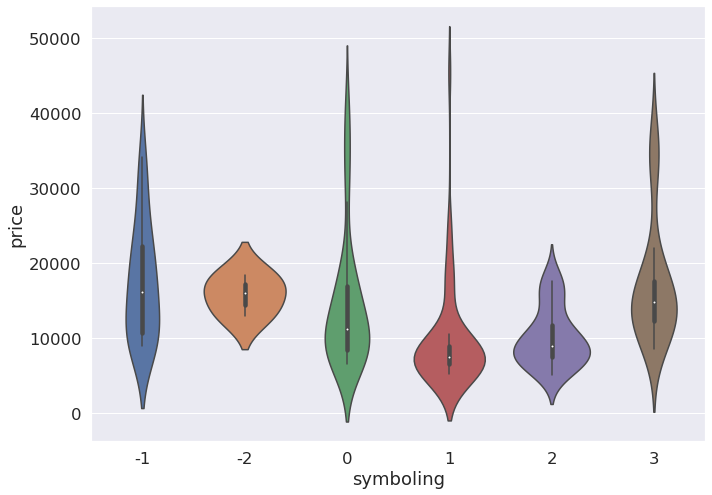

In [19]:
sns.set(style='darkgrid',font_scale=1.5)
plt.figure(figsize=(11,8))
sns.violinplot(x = 'symboling', y = 'price', data = auto)

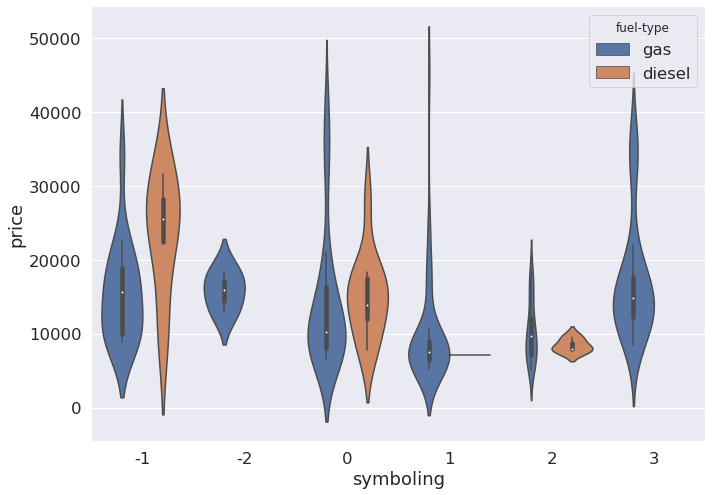

In [20]:
sns.set(style='darkgrid',font_scale=1.5)
plt.figure(figsize=(11,8))
sns.violinplot(x = 'symboling', y = 'price', hue = 'fuel-type', data = auto)

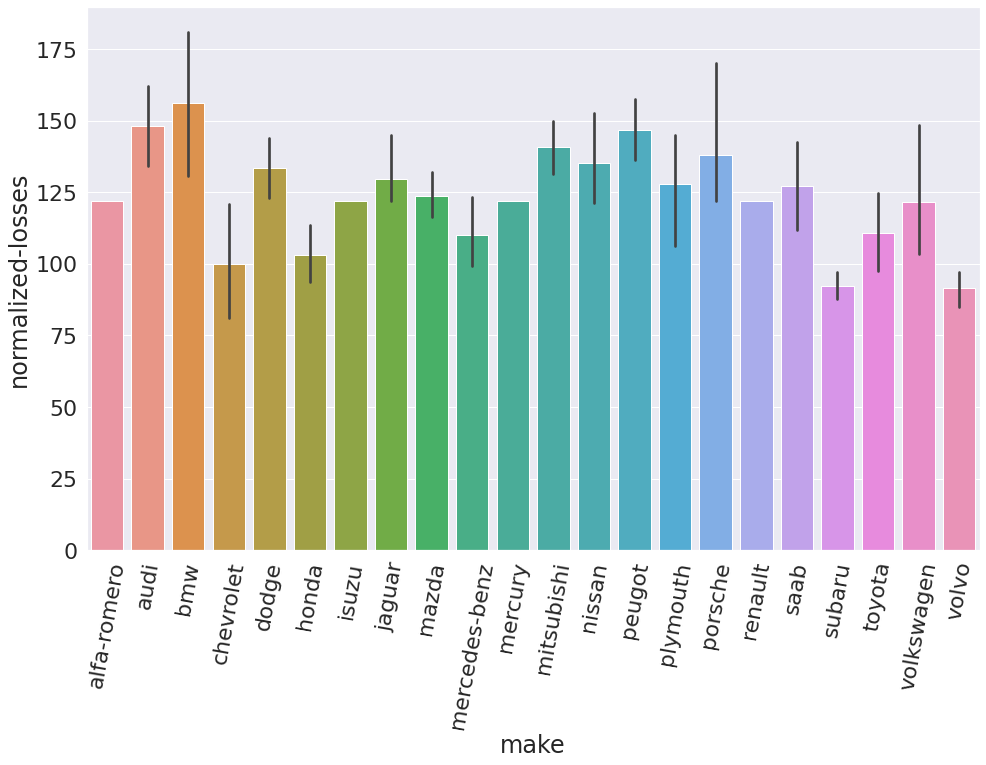

In [21]:
sns.set(style='darkgrid',font_scale=2)
plt.figure(figsize=(16,10))
plot = sns.barplot(x = 'make', y = 'normalized-losses', data = auto)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

**Correlation Matrix**

In [22]:
auto[numerical_cols].corr()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
normalized-losses,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642
length,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628
width,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265
height,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415
engine-size,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155
stroke,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269
compression-ratio,-0.114713,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001263,0.187871,1.000000,-0.214489,-0.435780,0.331425,0.268465,0.071107


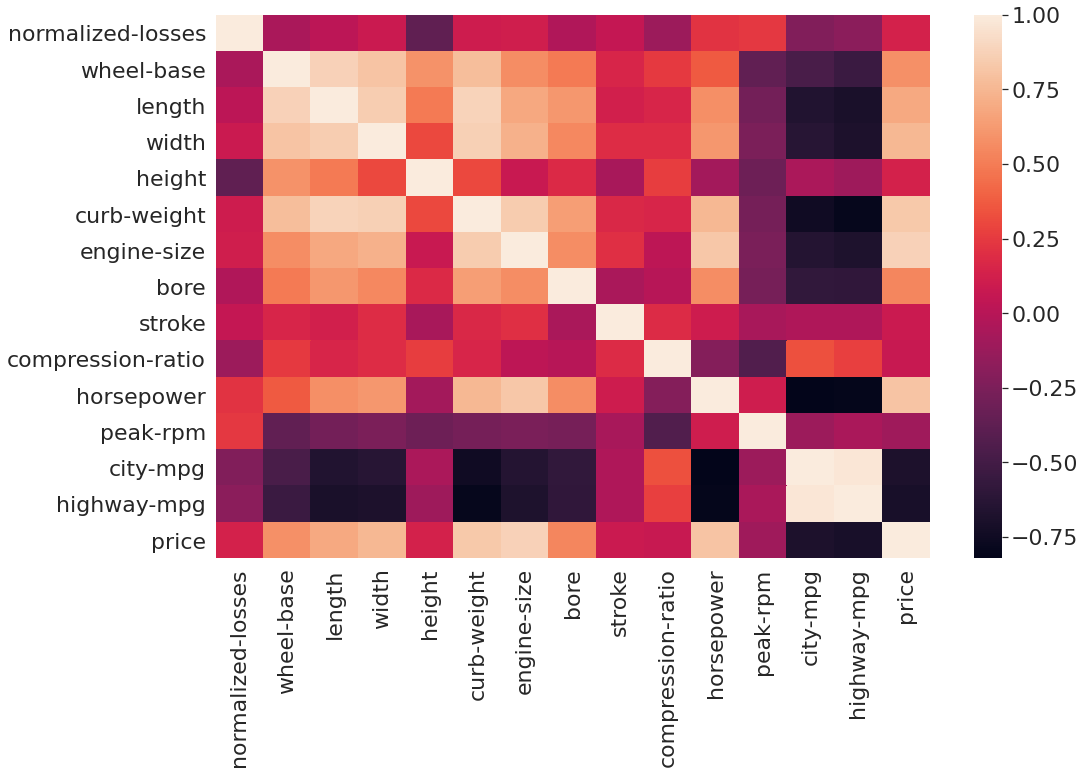

In [23]:
sns.set(style='darkgrid',font_scale=2)
plt.figure(figsize=(16,10))

sns.heatmap(auto[numerical_cols].corr())



    1. Wheelbase has high positive correlation with carlength,
    carwidth and curbweight.
    2. Carlength has high postive correlation with curbweight.
    3. Carlength has negative correlation with highwaympg.
    4. Carwidth has high postive correlation with curbweight and
    engine size.
    5. Enginesize has high positive correlation with horsepower.
    6. Curbweight has high positive correlation with engine size 
    and horse power, negative correlation with highwaympg.
    7. Horsepower has negative correlation with citympg
    and highwaympg.
    8. Citympg and highwaympg are highly correlated.



**Engine Size vs Price**

(0.0, 53147.341632490556)

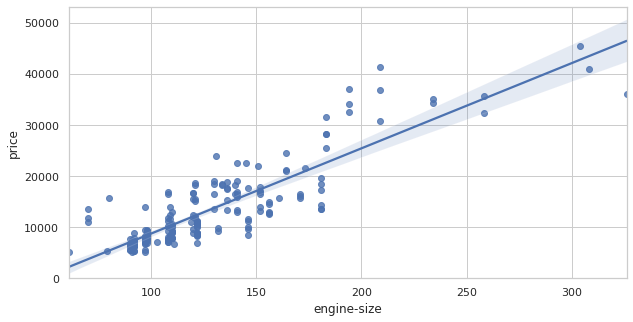

In [24]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(10,5))
sns.regplot(x="engine-size", y="price", data=auto)
plt.ylim(0,)



As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.


**Highway-mpg vs Price**

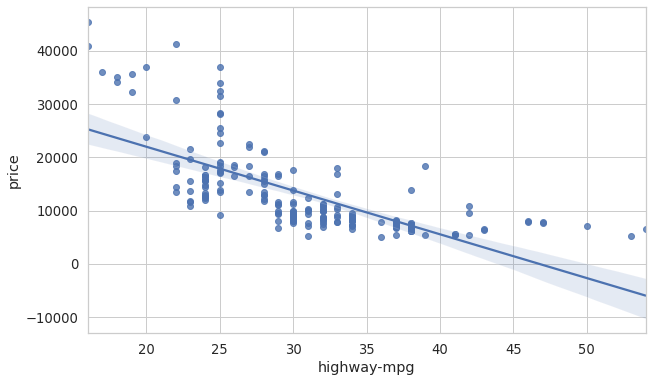

In [25]:
sns.set(style='whitegrid',font_scale=1.2)
plt.figure(figsize=(10,6))
sns.regplot(x="highway-mpg", y="price", data=auto)

As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

**Engine-type vs Price**

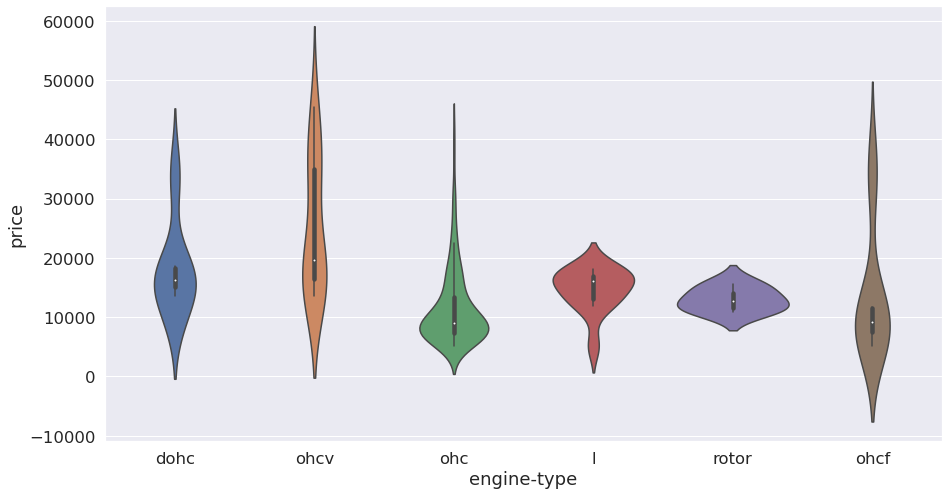

In [26]:
sns.set(style='darkgrid',font_scale=1.5)
plt.figure(figsize=(15,8))
sns.violinplot(x="engine-type", y="price", data=auto)

price range of ohcv engine cars are quite high in compare to others

**Curbweight vs Price**

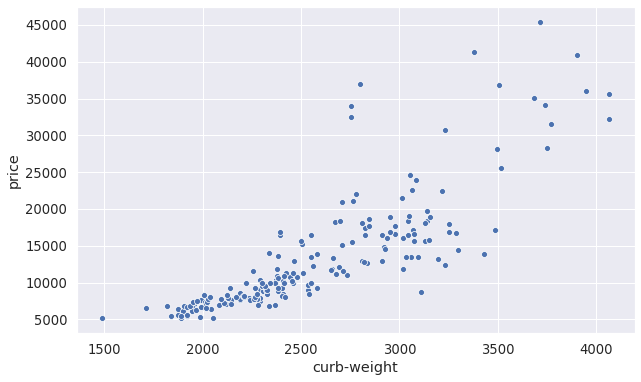

In [27]:
sns.set(style='darkgrid',font_scale=1.2)
plt.figure(figsize=(10,6))
sns.scatterplot(x="curb-weight", y="price", data=auto,color='b')

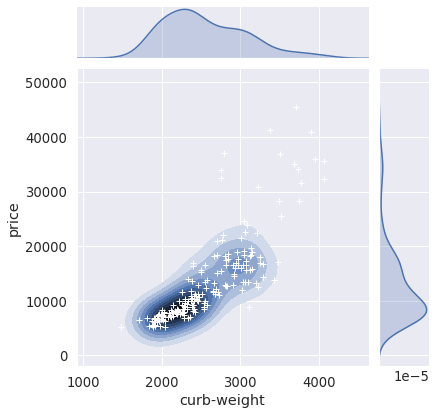

In [28]:
g = sns.jointplot(x="curb-weight", y="price", data=auto, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("curb-weight", "price");

Points are scattered after curbweight of 2900, initially it is increasing as curbweight increases as you can alse see in the joint plot color becomes lighter after curbweight of 2900 .

 # DATA MODELLING

**Recursive feature elimination (RFE)**

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

X=auto[numerical_cols].drop('price',axis=1)
Y=auto['price']

X = auto.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['make','price'],axis=1)
y=auto['price']

clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')


In [30]:
features = list(X.columns[rfe.support_])

In [31]:
from sklearn.model_selection import train_test_split
X = X[features]
Y = auto['price']
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state = 0)

#### LINEAR REGRESSION

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,Y)
predictions = lm.predict(x_test)

r2_score(y_test, predictions)

0.7874896125620198

#### DECISION TREES

In [33]:
from sklearn.tree import DecisionTreeRegressor
d_tree = DecisionTreeRegressor(random_state=0)
d_tree.fit(x_train,y_train)
y_test_pred = d_tree.predict(x_test)
y_train_pred = d_tree.predict(x_train)

r2_score(y_test,y_test_pred)

0.8858454377831195

#### RANDOM FORESTS

In [34]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9099571436208806

# CONCLUSION


    We applied three models Linear Regression, Decision Tree 
    Regressor and RandomForest Regressor
    
    Among these three models random forest is performing best. 
    (with accuracy ~ 0.91)

